# __Book Recommendation System for Children__

## Table of Content

* [1. Background](#background)
* [2. Import](#import)
* [3. Open data files](#open)
* [4. Data type and missing data ](#missing)
* [5. Convert data type](#type)
* [6. Language](#lang)
* [7. Fix missing titles](#title)
* [8. Check for duplicates](#duplicate)
* [9. Distribution of rating counts of the books](#rating_count)
* [10. Distribution of reviews count ](#review_count)
* [11. Book description](#description)
* [12. What percentages are also available as ebook?](#ebook)
* [13. Distribution of number of pages](#num)
* [14. Distribution of books published annually](#year)
* [15. List of 10 publishers with highest number of published books](#publisher)
* [16. Distribution of average rating](#average_rating)
* [17. What columns and rows should we drop? ](#drop)
* [18. Authors](#authors)
* [19. Genres](#genres)
* [20. Book reviews](#reviews)
    * [20.1. What do we need from reviews?](#separate)
* [21. Merge files](#merge)
* [22. Summary](#summary)


## 1. Background   <a class='anchor' id='background'><a/>

Studies show that parents and caregivers play an important role in  development and educational performance of their children. Parental reading to  children improves the child’s cognitive skills. This is an early-life intervention that children can benefit from for the rest of their lives.  Therefore, having a recommendation system with focus on children is important.

This norebook focus on doing this. The data can be found [here](https://sites.google.com/eng.ucsd.edu/ucsdbookgraph/home)


## 2. Imports <a class='anchor' id='import'><a/>

In [342]:
import gzip
import json
import re
import os
import sys

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,}'.format

import matplotlib.pyplot as plt
import seaborn as sns

from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 0

## 3. Open data files <a class='anchor' id='open'>
    
There are four files available from the good reads. Data can be found [here.](https://sites.google.com/eng.ucsd.edu/ucsdbookgraph/home) 

There are:
    
    1. Books
    
    2. Reviews
    
    3. Genres
    
    4. Authors
 
We start by Books.
  

In [343]:
DIR = 'C:\\Users\\somfl\\Documents\\GitHub\\Somayeh_Youssefi\\Book Recomendation System\\data_files'

In [344]:
books = []
filename = os.path.join(DIR, 'goodreads_books_children.json.gz') 
with gzip.open(filename) as file:
    for l in file:
        
        books.append(json.loads(l))

books = pd.DataFrame(books)
books.head(3).T

,0,1,2
isbn,1599150603,1934876569,0590417010
text_reviews_count,7,6,193
series,[],[151854],[]
country_code,US,US,US
language_code,,,eng
popular_shelves,"[{'count': '56', 'name': 'to-read'}, {'count':...","[{'count': '515', 'name': 'to-read'}, {'count'...","[{'count': '450', 'name': 'to-read'}, {'count'..."
asin,,,
is_ebook,false,false,false
average_rating,4.13,4.22,4.43
kindle_asin,B00DU10PUG,,B017RORXNI


In [345]:
print('There are {} books with {} features.'.format(books.shape[0], books.shape[1]))

There are 124082 books with 29 features.


In [346]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124082 entries, 0 to 124081
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   isbn                  124082 non-null  object
 1   text_reviews_count    124082 non-null  object
 2   series                124082 non-null  object
 3   country_code          124082 non-null  object
 4   language_code         124082 non-null  object
 5   popular_shelves       124082 non-null  object
 6   asin                  124082 non-null  object
 7   is_ebook              124082 non-null  object
 8   average_rating        124082 non-null  object
 9   kindle_asin           124082 non-null  object
 10  similar_books         124082 non-null  object
 11  description           124082 non-null  object
 12  format                124082 non-null  object
 13  link                  124082 non-null  object
 14  authors               124082 non-null  object
 15  publisher        

## 4. Data type and missing data <a class='anchor' id='missing'>
    
Let's check for the type and missing data. 
    
There is no missing data, however, it may be because of the type of the data, which is all object. Next we will change columns to the right data type and will check for missing values.

<AxesSubplot:>

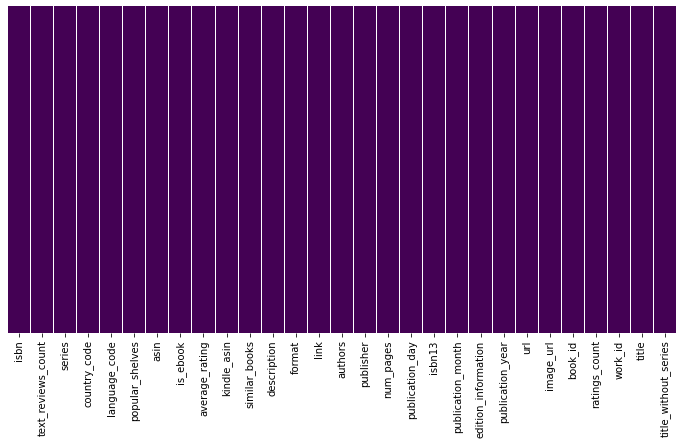

In [347]:
plt.figure(figsize=(12,6))
sns.heatmap(books.isna(), cbar=False, cmap='viridis', yticklabels=False)

## 5. Convert data type <a class='anchor' id='type'>

In [348]:
# change columns to integer values
int_columns = ['text_reviews_count', 'ratings_count']
for x in int_columns:
    books[x] = books[x].astype(int)

In [349]:
float_columns =['average_rating']
for x in float_columns:
    books[x] = books[x].astype(float)

In [350]:
string_columns = ['description', 'format', 'link', 'authors', 'publisher', 'edition_information', 'url', 'image_url', 
                  'title', 'title_without_series', 'isbn', 'series', 'asin', 'kindle_asin', 'isbn13', 'book_id', 'work_id']
for x in string_columns:
    books[x] = books[x].astype(str)

## 6. Language <a class = 'anchor' id='lang'>
    
Let's check what languages are in our data base. We can see that 'eng', 'en-GB', 'en-US', 'en-CA' all can be replaced by 'eng'. We are not interested in non-english books.
There are ' ' and '--' languages. We use _detect_  to find the language of these books.

In [352]:
books['language_code'].unique()

array(['', 'eng', 'fin', 'en-GB', 'scr', 'fil', 'en-US', 'per', 'por',
       'ger', 'tur', 'vie', 'ara', 'spa', 'nl', 'gre', 'zho', 'est',
       'fre', 'dan', 'cze', 'ben', 'ind', 'rum', 'ita', '--', 'cat',
       'swe', 'nor', 'hun', 'rus', 'lit', 'bul', 'mul', 'slo', 'pol',
       'ukr', 'nob', 'en-CA', 'afr', 'pes', 'lav', 'kor', 'smn', 'mal',
       'kat', 'heb', 'srp', 'jpn', 'tha', 'slv', 'nno', 'msa', 'oci',
       'pt-BR', 'aze', 'lat', 'vls', 'tgl', 'isl', 'gem', 'mkd', 'non',
       'sin', 'mon', 'mlt', 'gle', 'egy', 'en', 'glg', 'dut', 'hye',
       'sqi', 'sco', 'epo', 'fao', 'dum', 'yid', 'guj', 'bos', 'eus',
       'hmn', 'nav', 'nld', 'kur', 'hin', 'kaz', 'krl', 'roh', 'nub'],
      dtype=object)

In [353]:
books[(books['language_code']=='') | (books['language_code']=='--')].shape[0]

72499

To find the language of a book, we use _detect_ either on the title or the book description, Where language is ' ' or '--'.

In [354]:
# Where language is ' ' or '--', apply detect either on the title or the book description to find the language 
no_language = []
for i in range(len(books)):
    if (books.loc[i, 'language_code']=='') | (books.loc[i, 'language_code']=='--'):
        try:
            if detect(books.loc[i, 'title']):
                books.loc[i, 'language_code'] = detect(books.loc[i, 'title'])
            elif detect(books.loc[i, 'description']):
                books.loc[i, 'language_code'] = detect(books.loc[i, 'description'])
            else:
                no_language.append[i]
        except:
            pass                   

In [356]:
# let's check if there is empty language filed 

'' in books['language_code'].unique()

True

It can be seen that ' ' is still present. Let's check them.

In [357]:
# Check books with empty language field

books.loc[books['language_code'] == '', ['title', 'description']]

,title,description
37228,123,Every masterful image by famed photographer An...
46881,,Ben has always been content to be brilliant at...
51395,1 2 3,The numbers 1 to 20 have never been so creativ...
68546,2095,"Zapped into the 21st century by ""The Book"", th..."
79301,1 2 3,-- This delightful series of board books has b...
84068,22 23,All the animals have advice for mouse on what ...


There are still a few books with ' ' language, which are in English as shown above. We will fix it manually.

In [358]:
# Change the language to eng

books.loc[books['language_code']=='', 'language_code'] ='eng'

Now let's replace en-CA, en-US, en-GB, and en with eng, and replace any other languages with 'other and plot a bar plot. 

In [359]:
# Replace en-CA, en-US, en-GB, and en with eng

books['language_code'] = books['language_code'].replace('en-US', 'eng').replace('en-GB', 'eng').replace('en-CA', 'eng').replace('en', 'eng')

In [360]:
# Let's replace non-Engilsh with 'Other' and then plot the bar plot

languages = ['fin', 'af', 'de', 'ar', 'scr', 'fil', 'so', 'sw', 'per',
       'it', 'fr', 'por', 'es', 'ger', 'fi', 'nl', 'et', 'tur', 'id',
       'ca', 'vie', 'pt', 'ara', 'cy', 'spa', 'gre', 'pl', 'zho', 'tl',
       'da', 'est', 'fre', 'dan', 'sv', 'lt', 'cze', 'ben', 'ind', 'rum',
       'ita', 'no', 'ro', 'cat', 'tr', 'swe', 'nor', 'hu', 'sk', 'vi',
       'sl', 'hun', 'rus', 'lit', 'fa', 'bul', 'mul', 'slo', 'lv', 'pol',
       'ja', 'zh-cn', 'ukr', 'nob', 'afr', 'pes', 'lav', 'sq', 'kor',
       'hr', 'smn', 'cs', 'mal', 'ur', 'kat', 'heb', 'ru', 'srp', 'jpn',
       'tha', 'slv', 'nno', 'msa', 'oci', 'pt-BR', 'ko', 'aze', 'lat',
       'vls', 'tgl', 'isl', 'gem', 'mkd', 'non', 'sin', 'uk', 'bn', 'mon',
       'mlt', 'gle', 'egy', 'glg', 'dut', 'hye', 'sqi', 'sco', 'epo',
       'fao', 'dum', 'yid', 'guj', 'bos', 'mk', 'eus', 'hmn', 'bg', 'nav',
       'he', 'nld', 'kur', 'hin', 'kaz', 'krl', 'roh', 'th', 'nub']
books['language_code'] = books['language_code'].replace(languages, 'other')

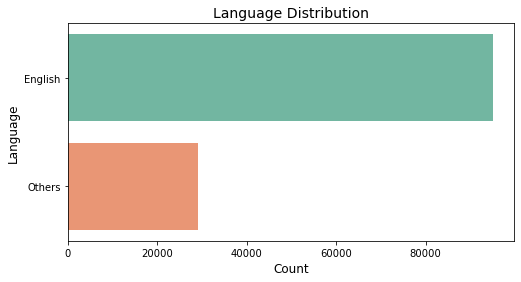

In [361]:
plt.figure(figsize = (8,4))
ax = sns.countplot(y="language_code", data=books, palette="Set2")

ax.set_yticklabels(['English', 'Others'])
ax.set_ylabel('Language', fontsize=12)
ax.set_xlabel('Count', fontsize=12)
ax.set_title("Language Distribution", fontsize=14)
 

plt.show()

In [362]:
print('There are {} English books and {} non-English books.'.format(books['language_code'].value_counts()[0], books['language_code'].value_counts()[1]))

There are 94988 English books and 29094 non-English books.


We are only interested in English books, therefore we ll drop non-English book later.

## 7. Fix missing titles <a class='anchor' id='title'>
    
As shown below, there is one book with missing title. We check the associated URL and fix the title manually.

In [363]:
books[(books['title'] == '') | (books['title'] == '--')].shape[0]

1

In [364]:
books[(books['title'] == '') | (books['title'] == '--')][['title','description', 'url']]

,title,description,url
46881,,Ben has always been content to be brilliant at...,https://www.goodreads.com/book/show/2433394


When we check the URL, the title of the book is _(George)_, let's fix it manually. But first I save books as df if anything goes wrong.


In [365]:
books.loc[46881,'title'] = '(George)'

In [366]:
print(books.shape)
print(books.loc[46881,:] )

(124082, 29)
isbn                                                           0440428475
text_reviews_count                                                      3
series                                                                 []
country_code                                                           US
language_code                                                         eng
popular_shelves         [{'count': '186', 'name': 'to-read'}, {'count'...
asin                                                                     
is_ebook                                                            false
average_rating                                                       3.63
kindle_asin                                                              
similar_books           [121457, 575252, 2849, 7793505, 809653, 299360...
description             Ben has always been content to be brilliant at...
format                                                          Paperback
link                     

So, we successfully changed the book title, without messing with the dataframe. Next let's check if we have duplicates in data frame by checking book_id.

## 8. Check for duplicates <a claa='anchor' id='duplicate'>

In [367]:
books.duplicated(subset='book_id').sum()

0

In [368]:
books.duplicated(subset='title').sum()

27728

There is no duplicates in the data.

## 9. Distribution of rating counts of the books <a class='anchor' id='rating_count'>

Text(0, 0.5, 'Count')

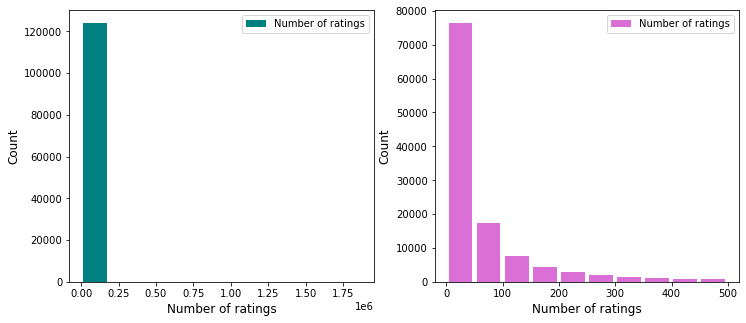

In [370]:
# Plot the histogram of the rating counts
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12,5)) 

books["ratings_count"].plot.hist(bins=10, rwidth=0.85, color="teal", ax=ax0)
books[books["ratings_count"]<500]['ratings_count'].plot.hist(bins=10, rwidth=0.85, color="orchid", ax=ax1)

ax0.legend(['Number of ratings'])
ax0.set_xlabel('Number of ratings', fontsize=12)
ax0.set_ylabel('Count', fontsize=12)

ax1.legend(['Number of ratings'])
ax1.set_xlabel('Number of ratings', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)


## 10. Distribution of reviews count  <a class='anchor' id='reviw_count'>

Text(0, 0.5, 'Count')

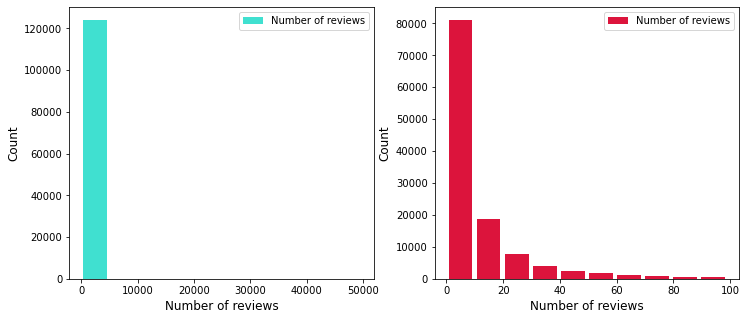

In [371]:
# Plot the histogram of the review counts
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12,5)) 

books["text_reviews_count"].plot.hist(bins=10, rwidth=0.85, color="turquoise", ax=ax0)
books[books["text_reviews_count"]<100]['text_reviews_count'].plot.hist(bins=10, rwidth=0.85, color="crimson", ax=ax1)

ax0.legend(['Number of reviews'])
ax0.set_xlabel('Number of reviews', fontsize=12)
ax0.set_ylabel('Count', fontsize=12)

ax1.legend(['Number of reviews'])
ax1.set_xlabel('Number of reviews', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)


## 11. Book description <a class='anchor' id='description'>

There are some books with empty description. Let's check the description of books and how long they are.

In [372]:
'' in books['description'].unique()

True

In [373]:
print('There are {} books with empty description.'.format(books[(books['description'] == '')].shape[0]))

There are 15238 books with empty description.


I realized some of the description filed are actually reference to websites. These need to be dropped.

In [378]:
descrip =[]
for i in range(len(books)):
               text = str(books.loc[i, 'description'])
               if (text.startswith('http'))|(text=='none')|(text==' '):
                   descrip.append(i)

In [379]:
len(descrip)

13

In [380]:
books.drop(descrip, axis=0, inplace=True)

Let's add a word_count column and count how many words are in each description.

In [381]:
books['word_count'] = books['description'].apply(lambda x: len(x.split()))#  word count

Text(0.5, 1.0, 'Distribution of number of words in the book description')

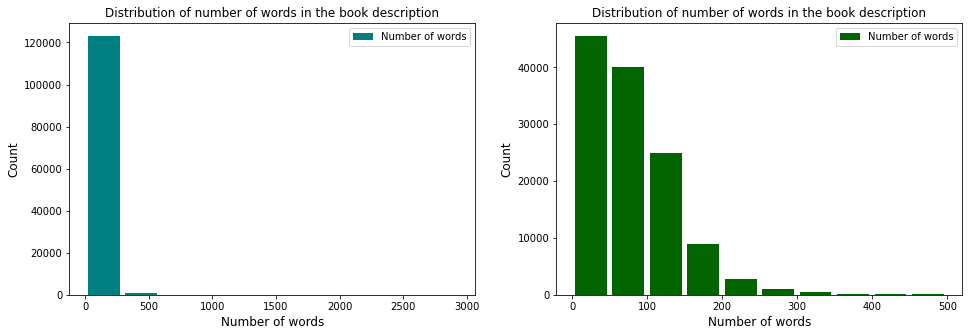

In [382]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(16,5)) 

books["word_count"].plot.hist(bins=10, rwidth=0.85, color="teal", ax=ax0)
books[books["word_count"]<500]['word_count'].plot.hist(bins=10, rwidth=0.85, color="darkgreen", ax=ax1)

ax0.legend(['Number of words'])
ax0.set_xlabel('Number of words', fontsize=12)
ax0.set_ylabel('Count', fontsize=12)
ax0.set_title('Distribution of number of words in the book description')
ax1.legend(['Number of words'])
ax1.set_xlabel('Number of words', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_title('Distribution of number of words in the book description')


In [389]:
# Let's replace empty description with np.nan.

books['description'] = books['description'].astype(str).replace(' ', np.nan)

## 12. What percentages are also available as ebook? <a class='anchor' id='ebook'>

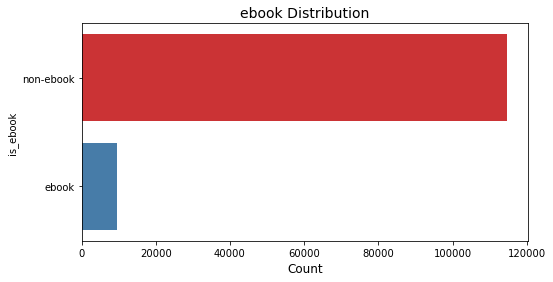

In [384]:
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.countplot(y="is_ebook", data=books, palette="Set1")
ax.set_yticklabels(['non-ebook', 'ebook'])
ax.set_xlabel('Count', fontsize=12)
ax.set_title("ebook Distribution", fontsize=14)
plt.show()

## 13. Distribution of number of pages <a class='anchor' id='num'>

In [393]:
'' in books['num_pages'].unique()

True

In [394]:
print("There are {} books with empty num_pages ".format(books[books['num_pages'] == ''].shape[0]))

There are 28196 books with empty num_pages 


In [395]:
# Let's replace empty number_pages with np.nan and change the type to float

books['num_pages'] = books['num_pages'].astype(str).replace('', np.nan)

In [396]:
books['num_pages'] = books['num_pages'].astype(float)

Text(0.5, 1.0, 'Distribution of number of pages')

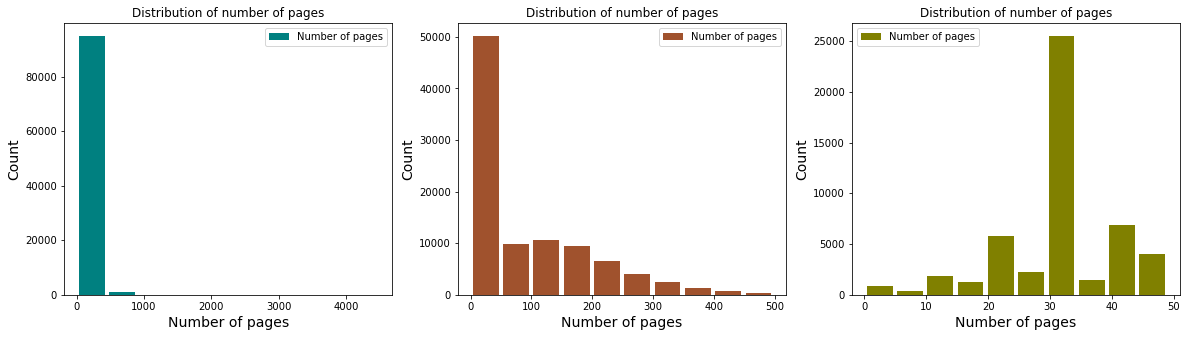

In [398]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(20,5)) 

books["num_pages"].plot.hist(bins=10, rwidth=0.85, color="teal", ax=ax0)
books[books["num_pages"]<500]['num_pages'].plot.hist(bins=10, rwidth=0.85, color="sienna", ax=ax1)
books[books["num_pages"]<50]['num_pages'].plot.hist(bins=10, rwidth=0.85, color="olive", ax=ax2)

ax0.legend(['Number of pages'])
ax0.set_xlabel('Number of pages', fontsize=14)
ax0.set_ylabel('Count', fontsize=14)
ax0.set_title('Distribution of number of pages')
ax1.legend(['Number of pages'])
ax1.set_xlabel('Number of pages', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)
ax1.set_title('Distribution of number of pages')
ax2.legend(['Number of pages'])
ax2.set_xlabel('Number of pages', fontsize=14)
ax2.set_ylabel('Count', fontsize=14)
ax2.set_title('Distribution of number of pages')

In [399]:
# there are a few books with >3000 pages.

books[books["num_pages"]>3000][['title','description', 'num_pages', 'average_rating']].sort_values(by='num_pages', ascending=False)

,title,description,num_pages,average_rating
34249,The New Junior Classics (The New Junior Classi...,1 = Fairy Tales and Fables\n(66 fairy tales fr...,"4,500.0",4.55
108944,The Wizard of Oz 15 Book Collection,"""Anyone in a fairy country like the Land of Oz...","3,816.0",4.47
73961,"Oz, the Complete Hardcover Collection: The Won...",nan,"3,600.0",4.62
69,The Complete Charlie Bone Series,nan,"3,520.0",4.4
90754,Dork Diaries Box Set (Ten Books Inside!): Dork...,Get your dork on with the ultimate Dork Diarie...,"3,296.0",4.53
99057,Pat of Silver Bush,"Patricia Gardner loved Silver Bush, the old-fa...","3,281.0",3.88
6299,Paul Jennings' Spookiest Stories,"Since Unreal was published in 1985, Paul Jenni...","3,210.0",3.89


## 14. Distribution of books published annually <a class='anchor' id='year'>
    
There are some strange publish year in the data. We replace anything >2018 and <1800 with np.nan.

In [400]:
books['publication_year'] = books['publication_year'].astype(str)

In [401]:
'' in books['publication_year'].unique()

True

In [402]:
books['publication_year'] = books['publication_year'].replace('', np.nan)

In [403]:
books['publication_year'] = books['publication_year'].astype(float)

In [404]:
books['publication_year'].describe()

count             104,244.0
mean    2,004.8115383139557
std      249.26364084580507
min                     0.0
25%                 1,999.0
50%                 2,007.0
75%                 2,013.0
max                65,535.0
Name: publication_year, dtype: float64

In [405]:
print('There are {} books with publication_year < 1800 or publication_year > 2018, which cannot be correct.'.format(books[(books['publication_year']>2018) | (books['publication_year']<1800)].shape[0]))

There are 60 books with publication_year < 1800 or publication_year > 2018, which cannot be correct.


Let's replace these strange publication_years by np.nan and then plot the histogram.

In [406]:
books[(books['publication_year']>2018) | (books['publication_year']<1800)].shape[0]

60

In [407]:
books.loc[(books['publication_year']>2018) | (books['publication_year']<1800)] = np.nan

(1900.0, 2020.0)

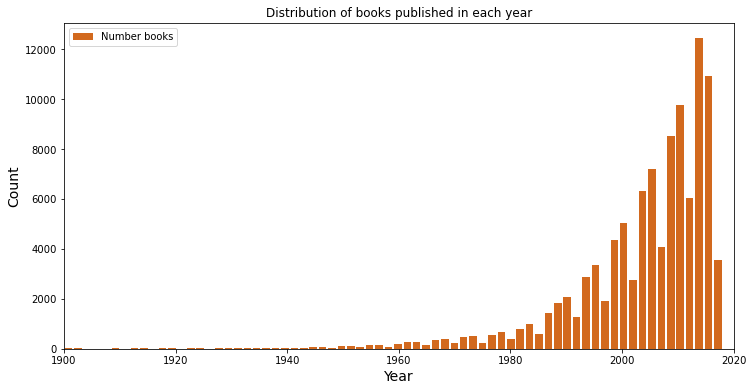

In [410]:
fig, ax = plt.subplots(figsize=(12,6)) 
books['publication_year'].plot.hist(bins=118, rwidth=0.8, color="chocolate", ax = ax)


ax.legend(['Number books'])
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Distribution of books published in each year')
ax.set_xlim([1900, 2020])

## 15. List of 10 publishers with highest number of published books <a class='anchor' id='publisher'>

In [411]:
books['publisher'].value_counts()[0:10]

                                        20139
HarperCollins                            3313
HMH Books for Young Readers              2569
Scholastic                               2175
Random House Books for Young Readers     1951
Puffin Books                             1403
Candlewick Press                         1393
Scholastic Paperbacks                    1236
Puffin                                   1220
Turtleback Books                         1119
Name: publisher, dtype: int64

## 16. Distribution of average rating <a class='anchor' id='average_rating'>

Text(0.5, 1.0, 'Distribution of average rating')

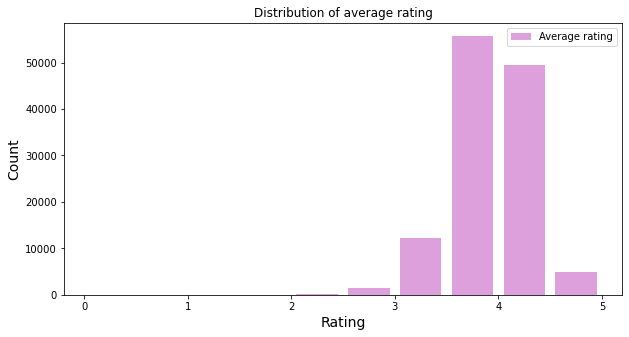

In [413]:
fig, ax = plt.subplots(figsize=(10,5)) 
books['average_rating'].plot.hist(rwidth=0.8, color="plum", ax = ax)


ax.legend(['Average rating'])
ax.set_xlabel('Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Distribution of average rating')


## 17. What columns and rows should we drop? <a class='anchor' id='drop'>

Our focus is on English books. So all non-English books will be dropped.

We drop books with no description and number of pages. 

We are also interested in books with average_rating equal or higher than 3.5.

In [414]:
# Drop those books of which language is not English!
books = books[books.language_code=='eng']
books['language_code'].value_counts()


eng    94954
Name: language_code, dtype: int64

In [415]:
books.columns

Index(['isbn', 'text_reviews_count', 'series', 'country_code', 'language_code',
       'popular_shelves', 'asin', 'is_ebook', 'average_rating', 'kindle_asin',
       'similar_books', 'description', 'format', 'link', 'authors',
       'publisher', 'num_pages', 'publication_day', 'isbn13',
       'publication_month', 'edition_information', 'publication_year', 'url',
       'image_url', 'book_id', 'ratings_count', 'work_id', 'title',
       'title_without_series', 'word_count'],
      dtype='object')

In [416]:
keeplist = ['book_id', 'isbn', 'title', 'description','num_pages', 'authors', 'ratings_count', 'average_rating', 'image_url', 'url', 'similar_books']
books = books[keeplist]
books.head(3)

,book_id,isbn,title,description,num_pages,authors,ratings_count,average_rating,image_url,url,similar_books
0,287141,1599150603,The Aeneid for Boys and Girls,"Relates in vigorous prose the tale of Aeneas, ...",162.0,"[{'author_id': '3041852', 'role': ''}]",46.0,4.13,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/287141.The...,[]
1,6066812,1934876569,All's Fairy in Love and War (Avalon: Web of Ma...,"To Kara's astonishment, she discovers that a p...",216.0,"[{'author_id': '19158', 'role': ''}]",98.0,4.22,https://images.gr-assets.com/books/1316637798m...,https://www.goodreads.com/book/show/6066812-al...,"[948696, 439885, 274955, 12978730, 372986, 216..."
2,89378,0590417010,Dog Heaven,In Newbery Medalist Cynthia Rylant's classic b...,40.0,"[{'author_id': '5411', 'role': ''}]","1,331.0",4.43,https://images.gr-assets.com/books/1360057676m...,https://www.goodreads.com/book/show/89378.Dog_...,"[834493, 452189, 140185, 1897316, 2189812, 424..."


In [417]:
books.isna().sum()

book_id               0
isbn                  0
title                 0
description           0
num_pages         22378
authors               0
ratings_count         0
average_rating        0
image_url             0
url                   0
similar_books         0
dtype: int64

In [418]:
books.shape

(94954, 11)

In [419]:
books = books.drop(books[books['average_rating']<3.5].index)

In [420]:
books.shape

(84697, 11)

In [421]:
# Let's drop books with no number of pages and description
books.dropna(inplace=True)
books.shape

(64423, 11)

In [422]:
df.drop(index=21909, axis=0, inplace = True)
df = df.reset_index().drop(columns='index')

In [423]:
# Let's set the book_id as index and then the book_id of books

books = books.set_index('book_id')
book_list = books.index

## 18. Authors <a class='anchor' id='authors'>
    
The Authors file includes author_id, rating and author name. The books data file includes the author_id. So we need to merge the two files by using the author_id as the key.

In [424]:
authors = []
filename = os.path.join(DIR, 'goodreads_book_authors.json.gz') 
with gzip.open(filename) as file:
    for l in file:
        
        authors.append(json.loads(l))

authors = pd.DataFrame(authors)
authors.head(3).T

,0,1,2
average_rating,3.98,4.08,3.92
author_id,604031,626222,10333
text_reviews_count,7,28716,5075
name,Ronald J. Fields,Anita Diamant,Barbara Hambly
ratings_count,49,546796,122118


In [425]:
authors.shape

(829529, 5)

In [426]:
authors = authors.set_index('author_id')

In [427]:
for book in book_list:
    author_ids = re.findall('[0-9]+', books.loc[book,'authors'])
    authors_names = []
    for author_id in author_ids:
        author_name = authors.loc[author_id, 'name']
        authors_names.append(author_name)
    books.at[book,'authors_names'] = authors_names
 

## 19. Genres <a class='anchor' id='genres'>

In [428]:
genres = []
filename = os.path.join(DIR, 'goodreads_book_genres_initial.json.gz') 
with gzip.open(filename) as file:
    for l in file:
        
        genres.append(json.loads(l))

genres = pd.DataFrame(genres)
genres.head(3).T

,0,1,2
book_id,5333265,1333909,7327624
genres,"{'history, historical fiction, biography': 1}","{'fiction': 219, 'history, historical fiction,...","{'fantasy, paranormal': 31, 'fiction': 8, 'mys..."


In [429]:
genres.shape

(2360655, 2)

In [430]:
# Let's filter and keep those books in our books data frame.
genres =  genres.loc[genres['book_id'].isin(book_list)]

In [431]:
genres.shape

(64423, 2)

## 20. Book reviews <a class='anchor' id='reviews'>

In [432]:
reviews = []
filename = os.path.join(DIR, 'goodreads_reviews_children.json.gz') 
with gzip.open(filename) as file:
    for l in file:
        
        reviews.append(json.loads(l))

reviews = pd.DataFrame(reviews)
reviews.head(3).T

,0,1,2
user_id,8842281e1d1347389f2ab93d60773d4d,8842281e1d1347389f2ab93d60773d4d,8842281e1d1347389f2ab93d60773d4d
book_id,23310161,17290220,6954929
review_id,f4b4b050f4be00e9283c92a814af2670,22d424a2b0057b18fb6ecf017af7be92,50ed4431c451d5677d98dd25ca8ec106
rating,4,5,5
review_text,Fun sequel to the original.,One of my favorite books to read to my 5 year ...,One of the best and most imaginative childrens...
date_added,Tue Nov 17 11:37:35 -0800 2015,Sat Nov 08 08:54:03 -0800 2014,Thu Oct 23 13:46:20 -0700 2014
date_updated,Tue Nov 17 11:38:05 -0800 2015,Wed Jan 25 13:56:12 -0800 2017,Thu Oct 23 13:47:00 -0700 2014
read_at,,Tue Jan 24 00:00:00 -0800 2017,
started_at,,,
n_votes,7,4,6


### 20.1.  What do we need from reviews? <a class='anchor' id='separate'>

We only need reviews for books in our cleaned book data file. We saved the list of book_ids. 
We need book_id, review_id, review_text, rating and n_votes, number of votes.

In [433]:
print('There are {} reviews.'.format(reviews.shape[0]))

There are 734640 reviews.


Let's do a search in reviews and see if there is any book with bad messages.

In [434]:
neg_book_review = []
neg_book_id = []
neg_review_text = []
for i in range(len(reviews)):
    text = reviews.loc[i,'review_text'].lower()
    if ((re.search('wrong message', text)) or (re.search('bad message', text)) or (re.search('body shame', text)) or (re.search('racist',text)) 
    or (re.search('hate speech', text)) or (re.search('body shaming', text)) or (re.search('physical appearance', text)) or (re.search('violence', text))
    or (re.search('stereotyping', text)) or (re.search('derogatory', text))):
        neg_book_id.append(reviews.loc[i,'book_id'])
        neg_book_review.append((reviews.loc[i,'book_id'],text))
        neg_review_text.append(text) 

In [435]:
print("There are {} negative reviews and there are {} books with negative material".format(len(set(neg_review_text)), len(set(neg_book_id))))

There are 2768 negative reviews and there are 1918 books with negative material


In [446]:
books= books.reset_index()

In [448]:

mask = ~books['book_id'].isin(set(neg_book_id))
books = books[mask]
books = books.reset_index()
books.drop(['index'], axis=1, inplace=True)


In [449]:
books.shape

(63031, 12)

In [450]:
book_list = books['book_id']

In [451]:
reviews_keep_list = ['book_id', 'review_id', 'rating', 'review_text', 'n_votes']
reviews = reviews[reviews_keep_list]
# Creating a mask to filter reviews

mask = reviews['book_id'].isin(book_list)
reviews = reviews[mask]

In [452]:
col_names = ['book_id', 'positive_review', 'negative_review']
data = []
review_summary =pd.DataFrame(data, columns=col_names)

for book in book_list:
    critical_review = ','.join(list(reviews[(reviews['book_id'] == book) & (reviews['rating']<=3)]['review_text'].astype(str)))
    positive_review = ','.join(list(reviews[(reviews['book_id'] == book) & (reviews['rating']>=4)]['review_text'].astype(str)))
    new_record = {'book_id': book, 'positive_review': positive_review, 'negative_review': critical_review}
    review_summary = review_summary.append(new_record, ignore_index = True)

In [116]:
review_summary.head()

,book_id,positive_review,negative_review
0,287141,"Once again, my kids loved this book about anci...",
1,6066812,,"This was a really cute book, though to be hone..."
2,89378,"Really cute, sweet, and charming.,This beautif...",I probably would have liked this book more if ...
3,1698376,,Colourful. Fun to read. My daughter enjoys thi...
4,3631900,My nine-year-old son and I enjoyed this book a...,"This is an enjoyable book, and Amadi is an eng..."


In [453]:
SavePath = 'C:\\Users\\somfl\\Documents\\GitHub\\Somayeh_Youssefi\\Book Recomendation System\\data_files\\Review_summary.csv'
reviews.to_csv(SavePath, sep =',')

## 21. Merge files <a class='anchor' id='merge'>

In [454]:
# Let's filter and keep those books in our books data frame.
genres =  genres.loc[genres['book_id'].isin(book_list)]

In [455]:
genres['book_id'] = genres['book_id'].astype(str)

df = books.merge(genres, on='book_id', how='inner')

In [456]:
df = df.merge(review_summary, on='book_id', how='inner')

In [457]:
df.head()

,book_id,isbn,title,description,num_pages,authors,ratings_count,average_rating,image_url,url,similar_books,authors_names,genres,positive_review,negative_review
0,287141,1599150603,The Aeneid for Boys and Girls,"Relates in vigorous prose the tale of Aeneas, ...",162.0,"[{'author_id': '3041852', 'role': ''}]",46.0,4.13,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/287141.The...,[],Alfred J. Church,"{'history, historical fiction, biography': 9, ...","Once again, my kids loved this book about anci...",
1,6066812,1934876569,All's Fairy in Love and War (Avalon: Web of Ma...,"To Kara's astonishment, she discovers that a p...",216.0,"[{'author_id': '19158', 'role': ''}]",98.0,4.22,https://images.gr-assets.com/books/1316637798m...,https://www.goodreads.com/book/show/6066812-al...,"[948696, 439885, 274955, 12978730, 372986, 216...",[Rachel Roberts],"{'fantasy, paranormal': 32, 'young-adult': 8, ...",,"This was a really cute book, though to be hone..."
2,89378,0590417010,Dog Heaven,In Newbery Medalist Cynthia Rylant's classic b...,40.0,"[{'author_id': '5411', 'role': ''}]","1,331.0",4.43,https://images.gr-assets.com/books/1360057676m...,https://www.goodreads.com/book/show/89378.Dog_...,"[834493, 452189, 140185, 1897316, 2189812, 424...",[Cynthia Rylant],"{'children': 109, 'fiction': 13, 'non-fiction'...","Really cute, sweet, and charming.,This beautif...",I probably would have liked this book more if ...
3,1698376,1416904999,What Do You Do?,WHAT DO YOU DO?\nA hen lays eggs...\nA cow giv...,24.0,"[{'author_id': '169159', 'role': ''}]",23.0,3.57,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/1698376.Wh...,[],[Mandy Stanley],{'children': 6},,Colourful. Fun to read. My daughter enjoys thi...
4,3631900,0884482987,Amadi's Snowman: A Story of Reading,When Amadi disobeys his mother and runs off to...,32.0,"[{'author_id': '1540277', 'role': ''}, {'autho...",44.0,3.89,https://images.gr-assets.com/books/1300370678m...,https://www.goodreads.com/book/show/3631900-am...,[],"[Katia Novet Saint-Lot, Dimitrea Tokunbo]","{'fiction': 6, 'children': 8, 'young-adult': 1}",My nine-year-old son and I enjoyed this book a...,"This is an enjoyable book, and Amadi is an eng..."


In [458]:
# Let's save the final data file that has all neccessary info

SavePath = 'C:\\Users\\somfl\\Documents\\GitHub\\Somayeh_Youssefi\\Book Recomendation System\\data_files\\CleanedBooks.csv'
df.to_csv(SavePath, sep =',')

## 22. Summary <a class='anchor' id='summary'>

In [460]:
df.shape

(63031, 15)

In [459]:
df.isna().sum()

book_id            0
isbn               0
title              0
description        0
num_pages          0
authors            0
ratings_count      0
average_rating     0
image_url          0
url                0
similar_books      0
authors_names      0
genres             0
positive_review    0
negative_review    0
dtype: int64

In this notebook, 